## Import Packages

In [9]:
# Data Analysis and Wrangling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

# Section 1: Data Cleaning and Inspection

## Section 1.1: Reading in Data and Inspecting missing values

In [2]:
df = pd.read_csv('K-State-Data-Contest-2019/Data.csv')
df.head(2)

,Cancelled,Loan_Num,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_Category,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_DateRegisteredForWeb,Borrower_RegisteredForEForms,Borrower_DateRegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_DATERegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,Risk_Score,NoticeOfIntentToCancelDate,BankruptcyFlag,RecurringACH_TF
0,0,2A1D1E6B-1850-4D39-952F-893FA4BF7979,1/6/2015,0.0,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,10/12/2015,9,1,3035397,CA,92881-8459,TX,0.00,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,NaN,0,NaN,1,1/12/2015,Services,General Other,NaN,NaN,NaN,0
1,0,F67191BC-B396-4476-9E59-3A679EA19DB7,1/23/2015,0.0,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,11/16/2015,10,2,3018676,TX,77059-5531,TX,442.96,NaN,NaN,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,1,1,0,NaN,0,NaN,1,9/2/2014,Real Estate,General Other,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 48 columns):
Cancelled                                        140574 non-null int64
Loan_Num                                         140574 non-null object
Accepted_Date                                    140574 non-null object
Default_Charge                                   140574 non-null float64
Late_Charge                                      140574 non-null float64
NSF_Charge                                       140574 non-null float64
Premium                                          140574 non-null float64
Down                                             140574 non-null float64
AmtFin                                           140574 non-null float64
FinChg                                           140574 non-null float64
APR                                              140574 non-null float64
Term                                             140574 non-null int64
Mature_Date        

- We see that there are many missing values for some variables, so we will have to either delete them or find a method to impute the missing values.

In [4]:
df2 = df.copy()

In [5]:
df2.drop(columns=['Borrower_Category', # All null values
                'Borrower_DateRegisteredForWeb', 
                'Borrower_DateRegisteredForEForms', 
                'Borrower_DATERegisteredForCancellationWarning',
                'Mature_Date',
                'Risk_Score', # Internal metric that is highly sparse; other variables represent this better
                'BankruptcyFlag',
                'Agent_CancelEForm', # Extremely low correlation to cancellation (0.00007)
                'Agent_ReinstateEForm', # Extremely low correlation to cancellation (0.00007)
                'Agent_PendingPolicyRequestEForm', # Extremely low correlation to cancellation (0.00007)
                'Late_Charge', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_ACHPaymentLetterEForm', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_RecurringACHForm', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_DownPaymentViaCC', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_DownPaymentViaACH', # Non-significant difference between cancelled/non-cancelled policies
                'Loan_Num',                # Just an Index
                'Term',                    # Non-significant difference between cancelled/non-cancelled policies
                'Agent_RegisteredOnWeb',    # Non-significant difference between cancelled/non-cancelled policies
                'NoticeOfIntentToCancelDate' #Month was insignificant in relation to cancelled/non-cancelled policies
                 ], inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140574 entries, 0 to 140573
Data columns (total 29 columns):
Cancelled                                    140574 non-null int64
Accepted_Date                                140574 non-null object
Default_Charge                               140574 non-null float64
NSF_Charge                                   140574 non-null float64
Premium                                      140574 non-null float64
Down                                         140574 non-null float64
AmtFin                                       140574 non-null float64
FinChg                                       140574 non-null float64
APR                                          140574 non-null float64
Payments_Rcvd                                140574 non-null int64
Agent_ID                                     140574 non-null int64
Borrower_ID                                  140574 non-null int64
Borrower_State                               140574 non-null object
Bo

In [6]:
df2.isnull().sum()

Cancelled                                        0
Accepted_Date                                    0
Default_Charge                                   0
NSF_Charge                                       0
Premium                                          0
Down                                             0
AmtFin                                           0
FinChg                                           0
APR                                              0
Payments_Rcvd                                    0
Agent_ID                                         0
Borrower_ID                                      0
Borrower_State                                   0
Borrower_Zip                                     0
Agent_State                                      0
Exposure                                         7
Borrower_CreditScore                         46356
Borrower_EnrolledInEForms                        0
Agent_EnrolledInEForms                           3
Agent_IntentEForm              

## Section 1.2: Filling in Missing Values in Columns that have small amounts of missing data

In [7]:
df2['Exposure'].fillna(df2['Exposure'].median(),inplace=True) #Replacing missings with median and not mean because median
                                                                     #Is more robust due to wide variability of data
    
df2['Agent_EnrolledInEForms'].fillna(1, inplace=True) #Replacing missings with 1. Safe to assume agent was enrolled.
                                                              #Because about 75% of agents are
    
df2['Agent_IntentEForm'].fillna(1, inplace=True) #Same logic as previous variable

df2['Agent_RegisteredForCancelListReport'].fillna(0, inplace=True) #Replace with 0 because only 11% of agents registered

df2['Agent_RegisteredForEimpendingReport'].fillna(0, inplace=True) #Same logic as previous variable

In [ ]:
import os

PROJECT_ROOT_DIR = "K-State-Data-Contest-2019/K-State-Data-Contest-2019"  #Modified based on my directory
PROJECT_ID = "ipfs"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
df2.isnull().sum()

Cancelled                                        0
Accepted_Date                                    0
Default_Charge                                   0
NSF_Charge                                       0
Premium                                          0
Down                                             0
AmtFin                                           0
FinChg                                           0
APR                                              0
Payments_Rcvd                                    0
Agent_ID                                         0
Borrower_ID                                      0
Borrower_State                                   0
Borrower_Zip                                     0
Agent_State                                      0
Exposure                                         0
Borrower_CreditScore                         46356
Borrower_EnrolledInEForms                        0
Agent_EnrolledInEForms                           0
Agent_IntentEForm              

In [29]:
df['Premium'].mean()

23379.5377289571

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Saving figure Cancellation Rate by AutoPay


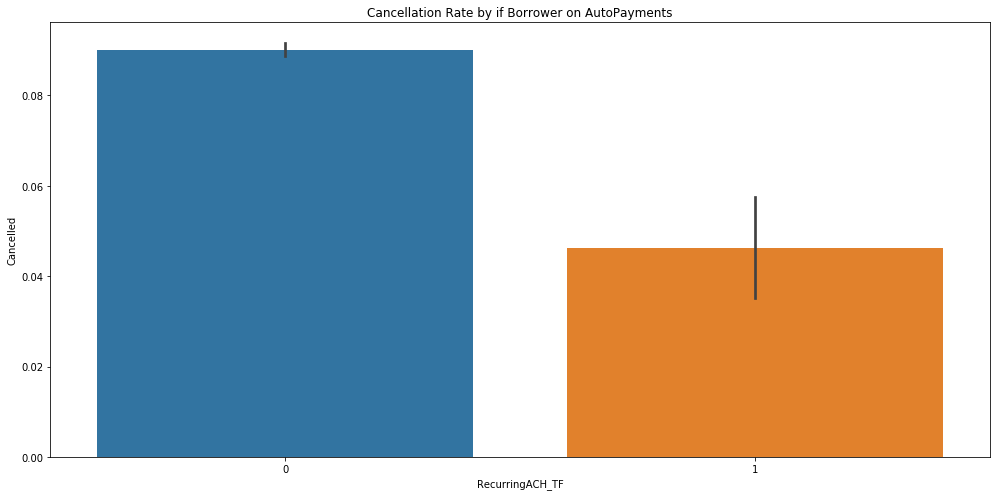

In [28]:
plt.figure(figsize=(14,7))
plt.title('Cancellation Rate by if Borrower on AutoPayments')
sns.barplot(x='RecurringACH_TF', y='Cancelled',data=df)
save_fig('Cancellation Rate by AutoPay')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Saving figure Cancellation Rate by Borrower WEB


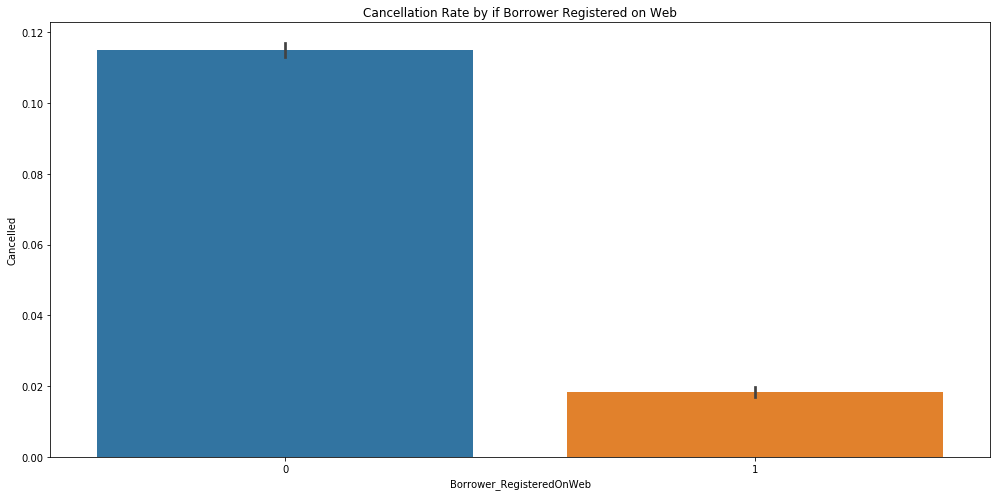

In [27]:
plt.figure(figsize=(14,7))
plt.title('Cancellation Rate by if Borrower Registered on Web')
sns.barplot(x='Borrower_RegisteredOnWeb', y='Cancelled',data=df)
save_fig('Cancellation Rate by Borrower WEB')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Saving figure Cancellation Rate by Borrower EForms


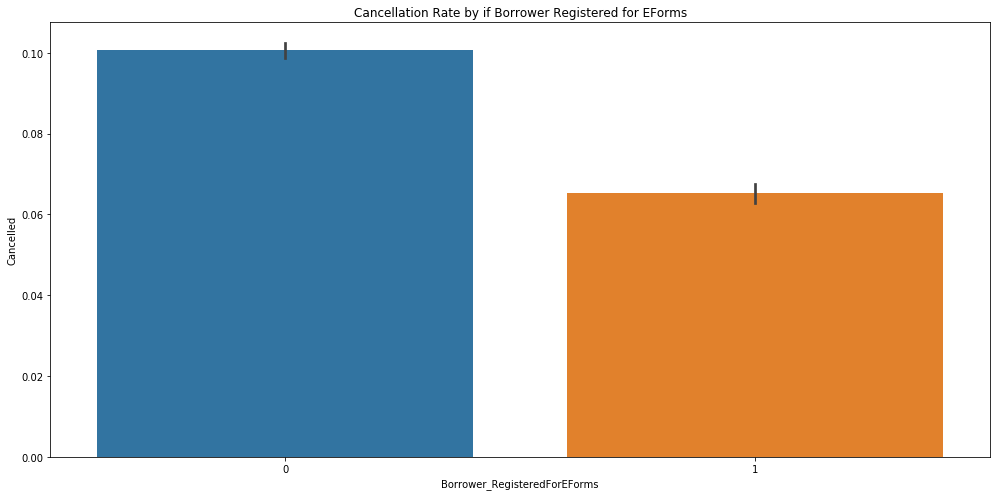

In [26]:
plt.figure(figsize=(14,7))
plt.title('Cancellation Rate by if Borrower Registered for EForms')
sns.barplot(x='Borrower_RegisteredForEForms', y='Cancelled',data=df)
save_fig('Cancellation Rate by Borrower EForms')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Saving figure Cancellation Rate by Borrower Cancel Warning


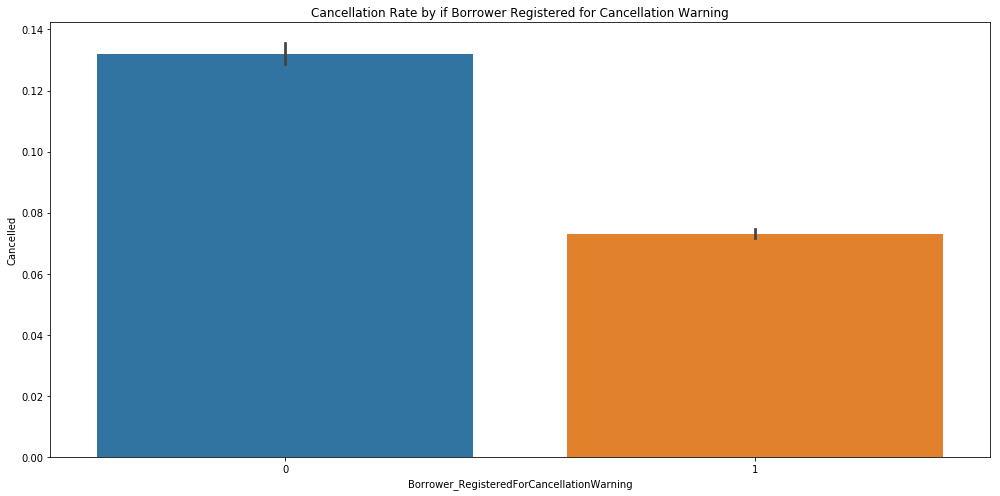

In [25]:
plt.figure(figsize=(14,7))
plt.title('Cancellation Rate by if Borrower Registered for Cancellation Warning')
sns.barplot(x='Borrower_RegisteredForCancellationWarning', y='Cancelled',data=df)
save_fig('Cancellation Rate by Borrower Cancel Warning')

# Section 2: Creating New Variables/Feature Engineering

## Variable 1: Creating A Borrower State Propensity to Cancel Loan Variable

- The idea behind this is to capture the actual relationship between which state a Borrower is from and the rate that Borrowers from that state cancel their loans. The majority of people who cancelled their loans were from Texas and Louisiana, but that doesn't necessarily mean that just because someone is from that state that they are more likely to cancel their loan based on the absolute number of loans cancelled in those states. We need to look at the proportion of loans cancelled by state by dividing the number of loans cancelled in a particular state by the total number of loans made in that state to see the rate of loan cancellation for an indivdual state, and not just the total number of cancelled.

In [9]:
states = df2.groupby('Borrower_State').size().index.values
loans = df2.groupby('Borrower_State').size().values
cancel = df2.groupby('Borrower_State')['Cancelled'].sum().values

d = {'states':states, 'num_loans_made':loans, 'num_loans_cancel':cancel}
df3 = pd.DataFrame(data=d)
df3 = df3.set_index(df3['states'])
df3['state_propensity_to_cancel'] = df3['num_loans_cancel'] / df3['num_loans_made'] #Creating the Variable


df2['state_propensity_to_cancel'] = df2['Borrower_State'] # Setting our new var column as the dictionary key


state_dict = {}
keys = df3.index
values = df3['state_propensity_to_cancel']
for i in keys:
        state_dict[i] = values[i]
        
df2['state_propensity_to_cancel'] = df2['state_propensity_to_cancel'].map(state_dict) #Replacing our column that is the dict key
                                                                                      #with the corresponding value in the dict
df2.head(2) # Checking to make sure it worked

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel
0,0,1/6/2015,0.0,0.0,2078.00,737.0,1341.00,113.94,19.95,9,...,0.0,1.0,1,0,0,1,Services,General Other,0,0.089109
1,0,1/23/2015,0.0,0.0,12033.18,3167.0,8866.18,438.52,10.65,10,...,0.0,1.0,1,0,0,1,Real Estate,General Other,0,0.100257


## Variable 2: Creating Agent Cancellation Rate Variable

- The goal of this variable is to see if there are any agents that make substantially more bad loans that cancel than other agents, and if so, we want to take that into account when making loans so that we can more accurately predict cancellations.

In [10]:
agents = df2.groupby('Agent_ID')['Cancelled'].sum().index
loans = df2.groupby('Agent_ID').size().values
cancel = df2.groupby('Agent_ID')['Cancelled'].sum().values


d = {'agent_id':agents, 'num_loans_made':loans, 'num_loans_cancel':cancel}
df4 = pd.DataFrame(data=d)
df4 = df4.set_index(keys='agent_id')
df4['agent_loan_cancellation_rate'] = df4['num_loans_cancel'] / df4['num_loans_made']


# This dictionary is to make key value pairs between agent ID and the proportion of the loans that they make that cancel
agent_dict = {}
keys = df4.index
values = df4['agent_loan_cancellation_rate']
for i in keys:
        agent_dict[i] = values[i]
        

# Creating the variable by filling the column by matching agent ID to Cancellation rate previously calculated
df2['Agent_Loan_Cancellation_Rate'] = df2['Agent_ID']
df2['Agent_Loan_Cancellation_Rate'] = df2['Agent_Loan_Cancellation_Rate'].map(agent_dict)

       
df2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate
0,0,1/6/2015,0.0,0.0,2078.0,737.0,1341.0,113.94,19.95,9,...,1.0,1,0,0,1,Services,General Other,0,0.089109,0.121026


## Variable 3: Creating a Flag for Known Bad Borrowers

- The goal of this variable is to have a flag to indicate if a borrower is a known bad borrower, meaning that they have cancelled more than one loan in the past. This will help us identify borrowers that we should not lend to because they have cancelled more than one of their loans in the past, and we believe that their past behavior will be indicitive of their future borrowing habits.

In [11]:
# This is the list of the 506 borrower ID's that have cancelled more than one loan
bad_borrowers = list(df2.groupby('Borrower_ID')['Cancelled'].sum().sort_values(ascending=False).head(506).index)

df2['bad_borrower'] = 0

df2['bad_borrower'] = df2['Borrower_ID'].apply(lambda x: 1 if x in bad_borrowers else 0)
        
df2[df2['bad_borrower'] == 1].head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower
8,1,3/2/2015,0.0,0.0,4699.38,1203.98,3495.4,284.58,17.95,1,...,1,0,0,0,Transportation,Trucking,0,0.100257,0.113869,1


## Variable 4: Create an indicator for Bad Zipcodes

- We want to check if a Borrower is from a zip code where there is known to be lots of cancellations proportional to the number of loans made. We also dont want to mischaracterize certain zip codes that have only had a few loans made there. For example, we dont want to label a zip code that has made 4 loans with 1 cancellation as bad, even though they have a cancellation rate of 25% because there is not a large enough sample size to adequately determine the quality of borrowers in that zip code. To avoid doing this, we decided to make sure that at least 10 loans had been made in a zip code, and that the cancellation rate was at least 13%, which is 5% higher than the mean cancellation rate of 8%.

In [12]:
df2['Borrower_Zip'] = df2['Borrower_Zip'].str.split('-').apply(lambda x: x[0])

zips = df2.groupby('Borrower_Zip')['Cancelled'].sum().index.values
loans = df2.groupby('Borrower_Zip').size().values
cancel = df2.groupby('Borrower_Zip')['Cancelled'].sum().values

d = {'num_loans_made':loans, 'num_loans_cancel':cancel}
df5 = pd.DataFrame(data=d, index=zips)
df5['ZipCode_Cancellation_Rate'] = df5['num_loans_cancel'] / df5['num_loans_made']


#Zips where number of loans is greater than 10 and cancellation rate is higher than 13%
bad_zips = df5[df5['num_loans_made'] >=10]['ZipCode_Cancellation_Rate'].sort_values(ascending=False).head(561).index.values


df2['Is_Bad_Zip'] = 0

df2['Is_Bad_Zip'] = df2['Borrower_Zip'].apply(lambda x: 1 if x in bad_zips else 0)
        
df2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower,Is_Bad_Zip
0,0,1/6/2015,0.0,0.0,2078.0,737.0,1341.0,113.94,19.95,9,...,0,0,1,Services,General Other,0,0.089109,0.121026,0,0


## Variable 5: Creating Dummy Variables for Borrower Industry

In [13]:
df2 = pd.get_dummies(df2, columns=["Borrower_Classification"], 
                     prefix=["Borrower_Industry"],
                     drop_first=True) # This makes Agriculture The reference category for Industry 
df2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Borrower_SubIndustry_Structure,Borrower_SubIndustry_Taxi/Limo Livery,Borrower_SubIndustry_Technical Assortment,Borrower_SubIndustry_Terraforming,Borrower_SubIndustry_Textile,Borrower_SubIndustry_Town,Borrower_SubIndustry_Tribe,Borrower_SubIndustry_Trucking,Borrower_SubIndustry_Well,Borrower_SubIndustry_Wireline
0,0,1/6/2015,0.0,0.0,2078.0,737.0,1341.0,113.94,19.95,9,...,0,0,0,0,0,0,0,0,0,0


## Variable 6: Imputing Borrower Credit Score with Multiple Different Classifiers using all other variables as predictors

In [14]:
df2['Borrower_CreditScore'].replace("NS",7,inplace=True) #To get rid of nulls because I cant get pandas to recognize np.nan dtype
df2['Borrower_CreditScore'].fillna(7,inplace=True)
df2['Borrower_CreditScore'].head()

0    7
1    7
2    7
3    7
4    7
Name: Borrower_CreditScore, dtype: object

In [15]:
df2['Borrower_CreditScore'].unique()

array([7, '3', '2', '5', '1', '4', '0'], dtype=object)

In [16]:
# Making a training dataset with no nulls so that our models can learn and predict null values in the testing dataset
training = df2[df2['Borrower_CreditScore'] != 7]
training.head()

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,...,Borrower_SubIndustry_Structure,Borrower_SubIndustry_Taxi/Limo Livery,Borrower_SubIndustry_Technical Assortment,Borrower_SubIndustry_Terraforming,Borrower_SubIndustry_Textile,Borrower_SubIndustry_Town,Borrower_SubIndustry_Tribe,Borrower_SubIndustry_Trucking,Borrower_SubIndustry_Well,Borrower_SubIndustry_Wireline
8,1,3/2/2015,0.0,0.0,4699.38,1203.98,3495.40,284.58,17.95,1,...,0,0,0,0,0,0,0,1,0,0
12,0,4/2/2015,0.0,0.0,996.64,249.16,747.48,76.56,23.95,9,...,0,0,0,0,0,0,0,0,0,0
14,0,4/13/2015,0.0,0.0,12440.00,3266.00,9174.00,598.90,14.00,10,...,0,0,0,0,0,0,0,1,0,0
16,0,6/11/2015,0.0,0.0,5368.00,1342.00,4026.00,338.60,17.95,10,...,0,0,0,0,0,0,0,0,0,0
18,0,6/12/2015,0.0,210.0,8025.00,1805.00,6220.00,406.10,14.00,10,...,0,0,0,0,0,0,0,1,0,0


In [17]:
len(training)

86529

### Splitting Data into Training and Test set

In [18]:
from sklearn.model_selection import train_test_split


# declare X variables and y variable
y = training['Borrower_CreditScore']
X = training.drop(['Borrower_CreditScore', 'Accepted_Date','Borrower_State','Borrower_Zip','Agent_ID','Borrower_ID',
               'Agent_State'], axis=1)

X = ((X - X.mean())/(X.std())) # Standardizing the values in the dataset

# Splitting into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Random Forest Classifier to predict Borrower Credit Score

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#RF Model
regr = RandomForestClassifier(n_estimators=850,random_state=0)
regr.fit(X_train, y_train)

regr_predicted = regr.predict(X_test)


print("--------------------------------------------------------")
print(confusion_matrix(y_test, regr_predicted)) 
print("--------------------------------------------------------")
print(classification_report(y_test, regr_predicted))
print("--------------------------------------------------------")

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


--------------------------------------------------------
[[ 146   80  200  214   11   35]
 [  12 1844 1068  626   21   57]
 [  10  529 3285  976   48   91]
 [  16  446 1323 2584   53  113]
 [   6  128  427  484  281   37]
 [  13  225  745  578   36  558]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.72      0.21      0.33       686
          1       0.57      0.51      0.54      3628
          2       0.47      0.67      0.55      4939
          3       0.47      0.57      0.52      4535
          4       0.62      0.21      0.31      1363
          5       0.63      0.26      0.37      2155

avg / total       0.53      0.50      0.49     17306

--------------------------------------------------------


#### Imputing the missing values for Borrower Credit Score in our Original DataFrame

In [30]:
X = test2[test2['Borrower_CreditScore'] == 7] 

X = X.drop(['Borrower_CreditScore', 'Accepted_Date','Borrower_State','Borrower_Zip','Agent_ID','Borrower_ID',
               'Agent_State'], axis=1)

regr_predicted = regr.predict(X)

In [43]:
for index,row in df2.iterrows():
    if df2['Borrower_CreditScore'][index] == 7:
        df2['Borrower_CreditScore'][index] = regr_predicted[i]

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df2['Borrower_CreditScore'] = df2['Borrower_CreditScore'].astype(int)

# =============================================================

# =============================================================

# =============================================================

# Section 3: Applying same data cleaning to the test dataset

## Section 3.1: Data Cleaning and Inspection

In [60]:
test = pd.read_csv('K-State-Data-Contest-2019/Test_Data.csv')
test.head(2)

,Cancelled,Loan_Num,Accepted_Date,Default_Charge,Late_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Term,Mature_Date,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_Category,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_RegisteredOnWeb,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_CancelEForm,Agent_ReinstateEForm,Agent_PendingPolicyRequestEForm,Agent_ACHPaymentLetterEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_RecurringACHForm,Agent_EnrolledInCreditProgram,Agent_DownPaymentViaCC,Agent_DownPaymentViaACH,Borrower_RegisteredOnWeb,Borrower_DateRegisteredForWeb,Borrower_RegisteredForEForms,Borrower_DateRegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_DATERegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,Risk_Score,NoticeOfIntentToCancelDate,BankruptcyFlag,RecurringACH_TF
0,0,E98E3CF6-E1CA-49A5-A309-E012B71F8BAF,10/31/2016,0.0,0.0,0.0,40240.20,10060.05,30180.15,902.43,7.12,9,7/30/2017,9,4,3030205,TX,77027-9063,TX,262.15,NaN,2,False,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1/28/2013,0,NaN,1,8/19/2016,Services,General Services,A,NaN,NaN,False
1,0,8F747765-C95F-4766-B9FF-82B8CCF5C166,10/20/2016,0.0,0.0,0.0,21513.76,5378.44,16135.32,660.68,7.50,10,9/17/2017,10,494,3060013,AL,36867-3178,TX,0.00,NaN,2,True,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1,12/11/2014,1,11/27/2013,Services,Medical,NaN,NaN,NaN,False


In [61]:
test2 = test.copy()

In [62]:
test2.drop(columns=['Borrower_Category', # All null values
                'Borrower_DateRegisteredForWeb', 
                'Borrower_DateRegisteredForEForms', 
                'Borrower_DATERegisteredForCancellationWarning',
                'Mature_Date',
                'Risk_Score', # Internal metric that is highly sparse; other variables represent this better
                'BankruptcyFlag',
                'Agent_CancelEForm', # Extremely low correlation to cancellation (0.00007)
                'Agent_ReinstateEForm', # Extremely low correlation to cancellation (0.00007)
                'Agent_PendingPolicyRequestEForm', # Extremely low correlation to cancellation (0.00007)
                'Late_Charge', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_ACHPaymentLetterEForm', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_RecurringACHForm', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_DownPaymentViaCC', # Non-significant difference between cancelled/non-cancelled policies
                'Agent_DownPaymentViaACH', # Non-significant difference between cancelled/non-cancelled policies
                'Loan_Num',                # Just an Index
                'Term',                    # Non-significant difference between cancelled/non-cancelled policies
                'Agent_RegisteredOnWeb',    # Non-significant difference between cancelled/non-cancelled policies
                'NoticeOfIntentToCancelDate' #Month was insignificant in relation to cancelled/non-cancelled policies
                 ], inplace = True)
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 29 columns):
Cancelled                                    42172 non-null int64
Accepted_Date                                42172 non-null object
Default_Charge                               42172 non-null float64
NSF_Charge                                   42172 non-null float64
Premium                                      42172 non-null float64
Down                                         42172 non-null float64
AmtFin                                       42172 non-null float64
FinChg                                       42172 non-null float64
APR                                          42172 non-null float64
Payments_Rcvd                                42172 non-null int64
Agent_ID                                     42172 non-null int64
Borrower_ID                                  42172 non-null int64
Borrower_State                               42172 non-null object
Borrower_Zip     

In [63]:
test2.isnull().sum()

Cancelled                                        0
Accepted_Date                                    0
Default_Charge                                   0
NSF_Charge                                       0
Premium                                          0
Down                                             0
AmtFin                                           0
FinChg                                           0
APR                                              0
Payments_Rcvd                                    0
Agent_ID                                         0
Borrower_ID                                      0
Borrower_State                                   0
Borrower_Zip                                     0
Agent_State                                      0
Exposure                                         3
Borrower_CreditScore                         13824
Borrower_EnrolledInEForms                        0
Agent_EnrolledInEForms                           0
Agent_IntentEForm              

## Section 3.2: Filling in Missing Values in Columns that have small amounts of missing data

In [64]:
test2['Exposure'].fillna(test2['Exposure'].median(),inplace=True) #Replacing missings with median and not mean because median
                                                                  #Is more robust due to wide variability of data


In [65]:
test2.isnull().sum()

Cancelled                                        0
Accepted_Date                                    0
Default_Charge                                   0
NSF_Charge                                       0
Premium                                          0
Down                                             0
AmtFin                                           0
FinChg                                           0
APR                                              0
Payments_Rcvd                                    0
Agent_ID                                         0
Borrower_ID                                      0
Borrower_State                                   0
Borrower_Zip                                     0
Agent_State                                      0
Exposure                                         0
Borrower_CreditScore                         13824
Borrower_EnrolledInEForms                        0
Agent_EnrolledInEForms                           0
Agent_IntentEForm              

## Section 3.2: Creating New Variables/Feature Engineering

### Variable 1: Creating A Borrower State Propensity to Cancel Loan Variable

- The idea behind this is to capture the actual relationship between which state a Borrower is from and the rate that Borrowers from that state cancel their loans. The majority of people who cancelled their loans were from Texas and Louisiana, but that doesn't necessarily mean that just because someone is from that state that they are more likely to cancel their loan based on the absolute number of loans cancelled in those states. We need to look at the proportion of loans cancelled by state by dividing the number of loans cancelled in a particular state by the total number of loans made in that state to see the rate of loan cancellation for an indivdual state, and not just the total number of cancelled.

In [66]:
states = test2.groupby('Borrower_State').size().index.values
loans = test2.groupby('Borrower_State').size().values
cancel = test2.groupby('Borrower_State')['Cancelled'].sum().values

d = {'states':states, 'num_loans_made':loans, 'num_loans_cancel':cancel}
test3 = pd.DataFrame(data=d)
test3 = test3.set_index(test3['states'])
test3['state_propensity_to_cancel'] = test3['num_loans_cancel'] / test3['num_loans_made'] #Creating the Variable


test2['state_propensity_to_cancel'] = test2['Borrower_State'] # Setting our new var column as the dictionary key


state_dict = {}
keys = test3.index
values = test3['state_propensity_to_cancel']
for i in keys:
        state_dict[i] = values[i]
        
test2['state_propensity_to_cancel'] = test2['state_propensity_to_cancel'].map(state_dict) #Replacing our column that is the dict key
                                                                                      #with the corresponding value in the dict
test2.head(2) # Checking to make sure it worked

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel
0,0,10/31/2016,0.0,0.0,40240.20,10060.05,30180.15,902.43,7.12,9,4,3030205,TX,77027-9063,TX,262.15,2,False,0,0,0,0,1,1,0,1,Services,General Services,False,0.100580
1,0,10/20/2016,0.0,0.0,21513.76,5378.44,16135.32,660.68,7.50,10,494,3060013,AL,36867-3178,TX,0.00,2,True,0,0,0,0,1,0,1,1,Services,Medical,False,0.040516


### Variable 2: Creating Agent Cancellation Rate Variable

- The goal of this variable is to see if there are any agents that make substantially more bad loans that cancel than other agents, and if so, we want to take that into account when making loans so that we can more accurately predict cancellations.

In [67]:
agents = test2.groupby('Agent_ID')['Cancelled'].sum().index
loans = test2.groupby('Agent_ID').size().values
cancel = test2.groupby('Agent_ID')['Cancelled'].sum().values


d = {'agent_id':agents, 'num_loans_made':loans, 'num_loans_cancel':cancel}
test4 = pd.DataFrame(data=d)
test4 = test4.set_index(keys='agent_id')
test4['agent_loan_cancellation_rate'] = test4['num_loans_cancel'] / test4['num_loans_made']


agent_dict = {}
keys = test4.index
values = test4['agent_loan_cancellation_rate']
for i in keys:
        agent_dict[i] = values[i]
        

# Creating the variable by filling the column by matching agent ID to Cancellation rate previously calculated
test2['Agent_Loan_Cancellation_Rate'] = test2['Agent_ID']
test2['Agent_Loan_Cancellation_Rate'] = test2['Agent_Loan_Cancellation_Rate'].map(agent_dict)

       
test2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate
0,0,10/31/2016,0.0,0.0,40240.2,10060.05,30180.15,902.43,7.12,9,4,3030205,TX,77027-9063,TX,262.15,2,False,0,0,0,0,1,1,0,1,Services,General Services,False,0.10058,0.118143


### Variable 3: Creating a Flag for Known Bad Borrowers

- The goal of this variable is to have a flag to indicate if a borrower is a known bad borrower, meaning that they have cancelled more than one loan in the past. This will help us identify borrowers that we should not lend to because they have cancelled more than one of their loans in the past, and we believe that their past behavior will be indicitive of their future borrowing habits.

In [68]:
# This is the list of the 506 borrower ID's that have cancelled more than one loan
bad_borrowers = list(test2.groupby('Borrower_ID')['Cancelled'].sum().sort_values(ascending=False).head(47).index)

test2['bad_borrower'] = 0

test2['bad_borrower'] = test2['Borrower_ID'].apply(lambda x: 1 if x in bad_borrowers else 0)
        
test2[test2['bad_borrower'] == 1].head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower
684,1,4/25/2016,0.0,0.0,12560.0,2512.0,10048.0,372.1,8.0,2,8,3089329,TX,75033-2471,TX,629.68,4,False,1,1,0,0,1,0,0,1,Transportation,General Transportation,False,0.10058,0.116071,1


### Variable 4: Create an indicator for Bad Zipcodes

- We want to check if a Borrower is from a zip code where there is known to be lots of cancellations proportional to the number of loans made. We also dont want to mischaracterize certain zip codes that have only had a few loans made there. For example, we dont want to label a zip code that has made 4 loans with 1 cancellation as bad, even though they have a cancellation rate of 25% because there is not a large enough sample size to adequately determine the quality of borrowers in that zip code. To avoid doing this, we decided to make sure that at least 10 loans had been made in a zip code, and that the cancellation rate was at least 13%, which is 5% higher than the mean cancellation rate of 8%.

In [69]:
test2['Borrower_Zip'] = test2['Borrower_Zip'].str.split('-').apply(lambda x: x[0])

zips = test2.groupby('Borrower_Zip')['Cancelled'].sum().index.values
loans = test2.groupby('Borrower_Zip').size().values
cancel = test2.groupby('Borrower_Zip')['Cancelled'].sum().values

d = {'num_loans_made':loans, 'num_loans_cancel':cancel}
test5 = pd.DataFrame(data=d, index=zips)
test5['ZipCode_Cancellation_Rate'] = test5['num_loans_cancel'] / test5['num_loans_made']


#Zips where number of loans is greater than 10 and cancellation rate is higher than 13%
bad_zips = test5[test5['num_loans_made'] >=10]['ZipCode_Cancellation_Rate'].sort_values(ascending=False).head(313).index.values


test2['Is_Bad_Zip'] = 0

test2['Is_Bad_Zip'] = test2['Borrower_Zip'].apply(lambda x: 1 if x in bad_zips else 0)
        
test2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_Classification,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower,Is_Bad_Zip
0,0,10/31/2016,0.0,0.0,40240.2,10060.05,30180.15,902.43,7.12,9,4,3030205,TX,77027,TX,262.15,2,False,0,0,0,0,1,1,0,1,Services,General Services,False,0.10058,0.118143,0,0


### Variable 5: Creating Dummy Variables for Borrower Industry and SubIndustry

In [70]:
test2 = pd.get_dummies(test2, columns=["Borrower_Classification"], 
                       prefix=["Borrower_Industry"],
                       drop_first=True) # This makes Agriculture The reference category for Industry 
test2.head(1)

,Cancelled,Accepted_Date,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Agent_ID,Borrower_ID,Borrower_State,Borrower_Zip,Agent_State,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,Borrower_SubTerm,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower,Is_Bad_Zip,Borrower_Industry_Construction,Borrower_Industry_General,Borrower_Industry_Government,Borrower_Industry_Manufacturing,Borrower_Industry_Mining,Borrower_Industry_Real Estate,Borrower_Industry_Retail Trade,Borrower_Industry_Services,Borrower_Industry_Transportation,Borrower_Industry_Wholesale Trade
0,0,10/31/2016,0.0,0.0,40240.2,10060.05,30180.15,902.43,7.12,9,4,3030205,TX,77027,TX,262.15,2,False,0,0,0,0,1,1,0,1,General Services,False,0.10058,0.118143,0,0,0,0,0,0,0,0,0,1,0,0


## Section 3.3: Re-inspecting test data and correcting any errors or incorrect data types

In [71]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 42 columns):
Cancelled                                    42172 non-null int64
Accepted_Date                                42172 non-null object
Default_Charge                               42172 non-null float64
NSF_Charge                                   42172 non-null float64
Premium                                      42172 non-null float64
Down                                         42172 non-null float64
AmtFin                                       42172 non-null float64
FinChg                                       42172 non-null float64
APR                                          42172 non-null float64
Payments_Rcvd                                42172 non-null int64
Agent_ID                                     42172 non-null int64
Borrower_ID                                  42172 non-null int64
Borrower_State                               42172 non-null object
Borrower_Zip     

### Replacing Boolean Values with 1 and 0, and Deleting unnecessary columns

In [72]:
test2['RecurringACH_TF'].replace({False: 0, True:1},inplace=True)
test2['RecurringACH_TF'].head()

0    0
1    0
2    0
3    0
4    0
Name: RecurringACH_TF, dtype: int64

In [73]:
test2['Borrower_EnrolledInEForms'].replace({False: 0, True: 1}, inplace=True)
test2['Borrower_EnrolledInEForms'].head()

0    0
1    1
2    1
3    0
4    0
Name: Borrower_EnrolledInEForms, dtype: int64

In [74]:
test2.drop(['Accepted_Date','Agent_ID','Borrower_ID','Borrower_State','Borrower_Zip','Agent_State','Borrower_SubTerm'],
           axis=1, inplace=True)
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 35 columns):
Cancelled                                    42172 non-null int64
Default_Charge                               42172 non-null float64
NSF_Charge                                   42172 non-null float64
Premium                                      42172 non-null float64
Down                                         42172 non-null float64
AmtFin                                       42172 non-null float64
FinChg                                       42172 non-null float64
APR                                          42172 non-null float64
Payments_Rcvd                                42172 non-null int64
Exposure                                     42172 non-null float64
Borrower_CreditScore                         28348 non-null object
Borrower_EnrolledInEForms                    42172 non-null int64
Agent_EnrolledInEForms                       42172 non-null int64
Agent_IntentEFor

### Variable 6: Imputing Borrower Credit Score with Multiple Different Classifiers using all other variables as predictors

In [75]:
test2['Borrower_CreditScore'].replace("NS",7,inplace=True) #To get rid of nulls because I cant get pandas to recognize np.nan dtype
test2['Borrower_CreditScore'].fillna(7,inplace=True)
test2['Borrower_CreditScore'].head()

0    2
1    2
2    3
3    3
4    1
Name: Borrower_CreditScore, dtype: object

In [76]:
test2['Borrower_CreditScore'].unique()

array(['2', '3', '1', 7, '0', '5', '4'], dtype=object)

In [77]:
training = test2[test2['Borrower_CreditScore'] != 7]
training.head()

,Cancelled,Default_Charge,NSF_Charge,Premium,Down,AmtFin,FinChg,APR,Payments_Rcvd,Exposure,Borrower_CreditScore,Borrower_EnrolledInEForms,Agent_EnrolledInEForms,Agent_IntentEForm,Agent_RegisteredForCancelListReport,Agent_RegisteredForEimpendingReport,Agent_EnrolledInCreditProgram,Borrower_RegisteredOnWeb,Borrower_RegisteredForEForms,Borrower_RegisteredForCancellationWarning,RecurringACH_TF,state_propensity_to_cancel,Agent_Loan_Cancellation_Rate,bad_borrower,Is_Bad_Zip,Borrower_Industry_Construction,Borrower_Industry_General,Borrower_Industry_Government,Borrower_Industry_Manufacturing,Borrower_Industry_Mining,Borrower_Industry_Real Estate,Borrower_Industry_Retail Trade,Borrower_Industry_Services,Borrower_Industry_Transportation,Borrower_Industry_Wholesale Trade
0,0,0.0,0.0,40240.20,10060.05,30180.15,902.43,7.12,9,262.15,2,0,0,0,0,0,1,1,0,1,0,0.100580,0.118143,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0.0,21513.76,5378.44,16135.32,660.68,7.50,10,0.00,2,1,0,0,0,0,1,0,1,1,0,0.040516,0.125000,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0.0,102593.00,20598.60,81994.40,1491.80,3.95,10,4099.72,3,1,0,0,0,0,1,1,1,1,0,0.100580,0.111111,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0.0,475.00,79.00,396.00,29.50,15.95,10,61.60,3,0,1,1,0,1,0,0,0,1,0,0.083719,0.069767,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0.0,5177.21,1137.82,4039.39,93.11,5.00,10,673.23,1,0,1,1,1,1,1,0,0,1,0,0.100580,0.121951,0,0,0,0,0,0,0,1,0,0,0,0


In [78]:
len(training)

25992

### Splitting Data into Training and Test set

In [80]:
from sklearn.model_selection import train_test_split


# declare X variables and y variable
y = training['Borrower_CreditScore']
X = training.drop(['Borrower_CreditScore'], axis=1)

X = ((X - X.mean())/(X.std())) # Standardizing the values in the dataset

# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Random Forest Classifier to predict Borrower Credit Score

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#RF Model
regr = RandomForestClassifier(n_estimators=850,random_state=0)
regr.fit(X_train, y_train)

regr_predicted = regr.predict(X_test)


print("--------------------------------------------------------")
print(confusion_matrix(y_test, regr_predicted)) 
print("--------------------------------------------------------")
print(classification_report(y_test, regr_predicted))
print("--------------------------------------------------------")

--------------------------------------------------------
[[ 21  30  76  96   3   7]
 [  3 389 433 248   6  17]
 [  7 246 783 380  14  26]
 [  2 182 444 684  17  36]
 [  0  41 165 164  27  22]
 [  3  88 249 219  11  60]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.09      0.16       233
           1       0.40      0.35      0.38      1096
           2       0.36      0.54      0.43      1456
           3       0.38      0.50      0.43      1365
           4       0.35      0.06      0.11       419
           5       0.36      0.10      0.15       630

   micro avg       0.38      0.38      0.38      5199
   macro avg       0.41      0.27      0.28      5199
weighted avg       0.38      0.38      0.35      5199

--------------------------------------------------------


#### Imputing the missing values for Borrower Credit Score in our Original DataFrame

In [83]:
X = test2[test2['Borrower_CreditScore'] == 7] 

X = X.drop(['Borrower_CreditScore'], axis=1)

regr_predicted = regr.predict(X)

In [84]:
for index,row in test2.iterrows():
    if test2['Borrower_CreditScore'][index] == 7:
        test2['Borrower_CreditScore'][index] = regr_predicted[i]

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
test2['Borrower_CreditScore'] = test2['Borrower_CreditScore'].astype(int)

In [86]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 35 columns):
Cancelled                                    42172 non-null int64
Default_Charge                               42172 non-null float64
NSF_Charge                                   42172 non-null float64
Premium                                      42172 non-null float64
Down                                         42172 non-null float64
AmtFin                                       42172 non-null float64
FinChg                                       42172 non-null float64
APR                                          42172 non-null float64
Payments_Rcvd                                42172 non-null int64
Exposure                                     42172 non-null float64
Borrower_CreditScore                         42172 non-null int32
Borrower_EnrolledInEForms                    42172 non-null int64
Agent_EnrolledInEForms                       42172 non-null int64
Agent_IntentEForm